#**Install required packages**

In [ ]:
pip install ucimlrepo

#**Retrieve the dataset**

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

adult = fetch_ucirepo(id=2)
data = adult.data.features
data['targets'] = adult.data.targets
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,targets
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


#**Check data information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  targets         48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#**Check NaN values**

In [ ]:
data.isnull().sum()/data.shape[0]

age               0.000000
workclass         0.019717
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.019778
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.005610
targets           0.000000
dtype: float64

#**Handling NaN Data**

In [ ]:
# Since all the three mentioned columns which have NaN values are "categorial" in nature thus, we'd use "forward/backward" fill to adjust the empty data
data = data.fillna(method='ffill')
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
targets           0
dtype: int64

#**Targets have 4 categorical values, where there should only be 2**

In [ ]:
data = data.replace('>50K.', '>50K')
data = data.replace('<=50K.', '<=50K')
data['targets'].value_counts()

targets
<=50K    37155
>50K     11687
Name: count, dtype: int64

#**Printing and Plotting**

In [ ]:
def myPrintAndPlotFunction(dataset: dict, string: str):
  dic = {}
  dic[string] = list(dataset.keys())
  dic['>50K'] = list(map(lambda x:x[0], list(dataset.values())))
  dic['<=50K'] = list(map(lambda x:x[1], list(dataset.values())))
  df = pd.DataFrame(dic)

  # Plotting of data
  import matplotlib.pyplot as plt
  Xaxis = list(map(str, dataset.keys()))
  Yaxis1 = list(map(lambda x:x[0], list(dataset.values())))
  Yaxis2 = list(map(lambda x:x[1], list(dataset.values())))

  '''p1 = plt.bar(Xaxis, Yaxis1, width = 0.3, color = 'yellow')
  p2 = plt.bar(Xaxis, Yaxis2, width = 0.3, color = 'maroon', bottom = Yaxis1)'''

  p1 = plt.barh(Xaxis, Yaxis1, color = 'yellow')
  p2 = plt.barh(Xaxis, Yaxis2, color = 'maroon', left = Yaxis1)

  plt.title(string + ' V/S targets')
  plt.xlabel('Values')
  plt.ylabel(string)
  plt.legend((p1[0], p2[0]), ('>50K', '<=50K'))
  plt.show()

  return df

#**Determining 'targets' based on 'age' parameter**

48842


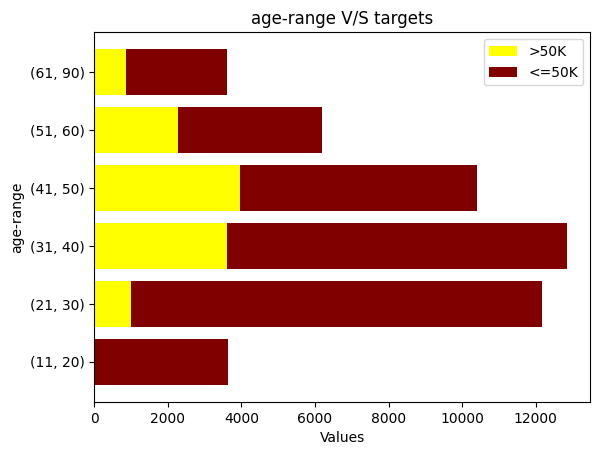

,age-range,>50K,<=50K
0,"(11, 20)",4,3619
1,"(21, 30)",989,11181
2,"(31, 40)",3608,9230
3,"(41, 50)",3965,6438
4,"(51, 60)",2270,3932
5,"(61, 90)",851,2755


In [ ]:
dict = {(i+1, i+10):[] for i in range(0, data['age'].max(), 10)}
del dict[(1, 10)]
del dict[(61, 70)]
del dict[(71, 80)]
del dict[(81, 90)]
dict[(61, 90)] = []
add = 0

for (key, val) in dict.items():
  x, y = key[0], key[1]
  gp = data[(data['age'] >= x) & (data['age'] <= y)].groupby('targets').agg({'age':'count'})

  dict[key].append(gp['age'][1] if not gp.empty else 0)
  dict[key].append(gp['age'][0] if not gp.empty else 0)

  add += gp['age'][1] if not gp.empty else 0
  add += gp['age'][0] if not gp.empty else 0

print(add)
myPrintAndPlotFunction(dict, 'age-range')

#**Determining 'targets' based on 'workclass' parameter**

48842


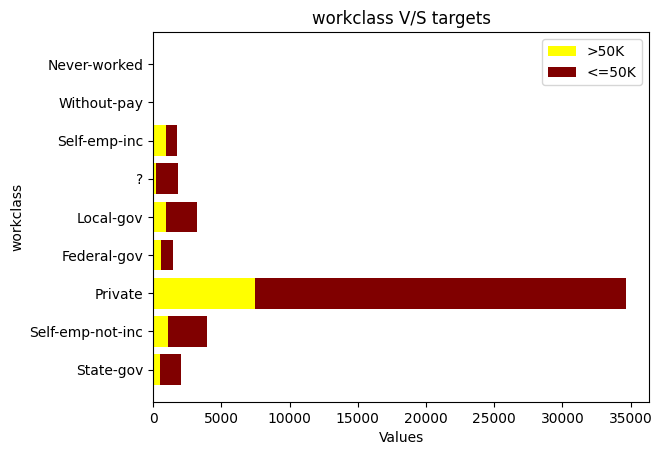

,workclass,>50K,<=50K
0,State-gov,533,1487
1,Self-emp-not-inc,1085,2852
2,Private,7443,27182
3,Federal-gov,563,906
4,Local-gov,929,2261
5,?,191,1645
6,Self-emp-inc,941,791
7,Without-pay,2,21
8,Never-worked,0,10


In [ ]:
dict = {string:[] for string in (data['workclass'])}
add = 0

for (key, val) in dict.items():
  gp = data[(data['workclass'] == key) & (data['targets'] == '>50K')].value_counts().sum()
  dict[key].append(gp)
  add += gp

  gp = data[(data['workclass'] == key) & (data['targets'] == '<=50K')].value_counts().sum()
  dict[key].append(gp)

  add += gp

print(add)
myPrintAndPlotFunction(dict, 'workclass')

#**Determining 'targets' based on 'education' parameter**

48842


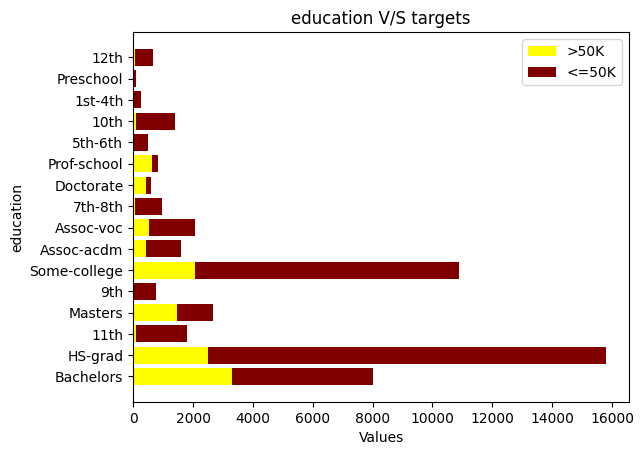

,education,>50K,<=50K
0,Bachelors,3313,4712
1,HS-grad,2503,13281
2,11th,92,1720
3,Masters,1459,1198
4,9th,41,715
5,Some-college,2063,8815
6,Assoc-acdm,413,1188
7,Assoc-voc,522,1539
8,7th-8th,62,893
9,Doctorate,431,163


In [ ]:
dict = {string:[] for string in (data['education'])}
add = 0

for (key, val) in dict.items():
  gp = data[(data['education'] == key) & (data['targets'] == '>50K')].value_counts().sum()
  dict[key].append(gp)
  add += gp

  gp = data[(data['education'] == key) & (data['targets'] == '<=50K')].value_counts().sum()
  dict[key].append(gp)

  add += gp

print(add)
myPrintAndPlotFunction(dict, 'education')

#**Determining 'targets' based on 'marital-status' parameter**

48842


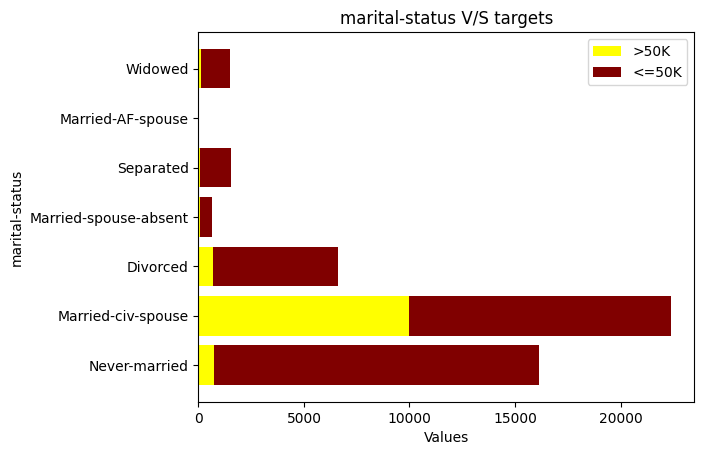

,marital-status,>50K,<=50K
0,Never-married,733,15384
1,Married-civ-spouse,9984,12395
2,Divorced,671,5962
3,Married-spouse-absent,58,570
4,Separated,99,1431
5,Married-AF-spouse,14,23
6,Widowed,128,1390


In [ ]:
dict = {string:[] for string in (data['marital-status'])}
add = 0

for (key, val) in dict.items():
  gp = data[(data['marital-status'] == key) & (data['targets'] == '>50K')].value_counts().sum()
  dict[key].append(gp)
  add += gp

  gp = data[(data['marital-status'] == key) & (data['targets'] == '<=50K')].value_counts().sum()
  dict[key].append(gp)

  add += gp

print(add)
myPrintAndPlotFunction(dict, 'marital-status')

#**Determining 'targets' based on 'occupation' parameter**

48842


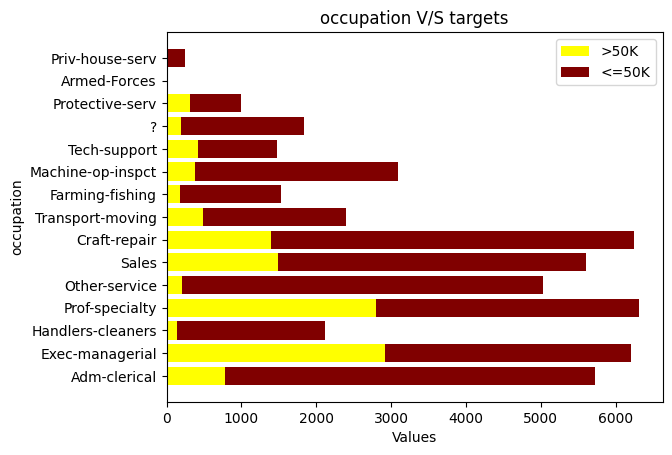

,occupation,>50K,<=50K
0,Adm-clerical,775,4948
1,Exec-managerial,2919,3289
2,Handlers-cleaners,138,1984
3,Prof-specialty,2793,3518
4,Other-service,213,4814
5,Sales,1484,4116
6,Craft-repair,1397,4848
7,Transport-moving,482,1919
8,Farming-fishing,176,1350
9,Machine-op-inspct,380,2714


In [ ]:
dict = {string:[] for string in (data['occupation'])}
add = 0

for (key, val) in dict.items():
  gp = data[(data['occupation'] == key) & (data['targets'] == '>50K')].value_counts().sum()
  dict[key].append(gp)
  add += gp

  gp = data[(data['occupation'] == key) & (data['targets'] == '<=50K')].value_counts().sum()
  dict[key].append(gp)

  add += gp

print(add)
myPrintAndPlotFunction(dict, 'occupation')

#**Determining 'targets' based on 'relationship' parameter**

48842


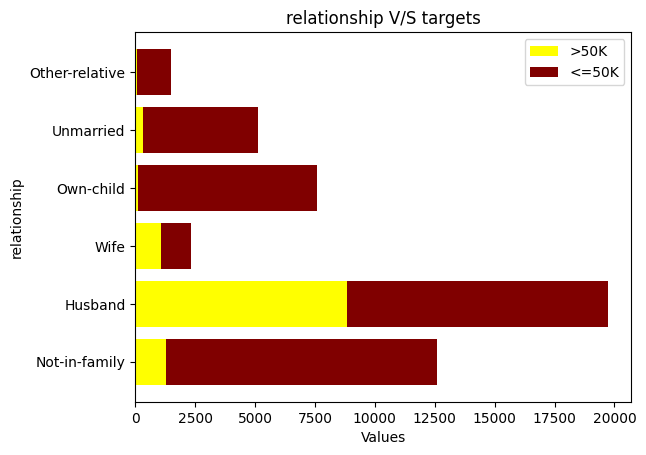

,relationship,>50K,<=50K
0,Not-in-family,1276,11307
1,Husband,8846,10870
2,Wife,1093,1238
3,Own-child,111,7470
4,Unmarried,309,4816
5,Other-relative,52,1454


In [ ]:
dict = {string:[] for string in (data['relationship'])}
add = 0

for (key, val) in dict.items():
  gp = data[(data['relationship'] == key) & (data['targets'] == '>50K')].value_counts().sum()
  dict[key].append(gp)
  add += gp

  gp = data[(data['relationship'] == key) & (data['targets'] == '<=50K')].value_counts().sum()
  dict[key].append(gp)

  add += gp

print(add)
myPrintAndPlotFunction(dict, 'relationship')

#**Determining 'targets' based on 'race' parameter**

48842


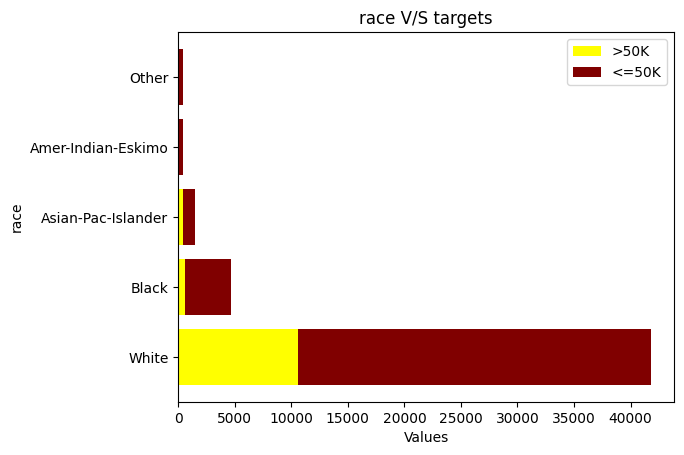

,race,>50K,<=50K
0,White,10607,31155
1,Black,566,4119
2,Asian-Pac-Islander,409,1110
3,Amer-Indian-Eskimo,55,415
4,Other,50,356


In [ ]:
dict = {string:[] for string in (data['race'])}
add = 0

for (key, val) in dict.items():
  gp = data[(data['race'] == key) & (data['targets'] == '>50K')].value_counts().sum()
  dict[key].append(gp)
  add += gp

  gp = data[(data['race'] == key) & (data['targets'] == '<=50K')].value_counts().sum()
  dict[key].append(gp)

  add += gp

print(add)
myPrintAndPlotFunction(dict, 'race')

#**Determining 'targets' based on 'sex' parameter**

48842


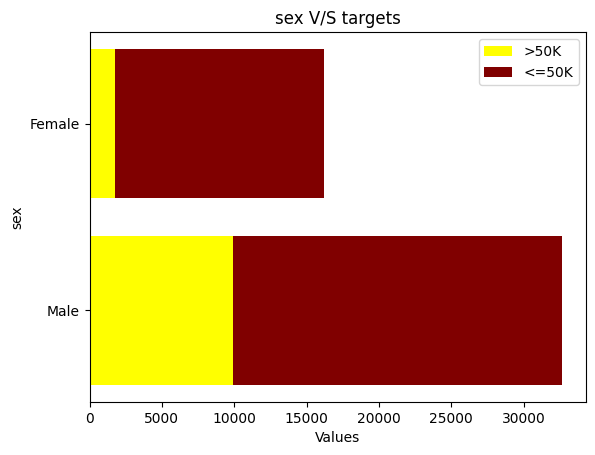

,sex,>50K,<=50K
0,Male,9918,22732
1,Female,1769,14423


In [ ]:
dict = {string:[] for string in (data['sex'])}
add = 0

for (key, val) in dict.items():
  gp = data[(data['sex'] == key) & (data['targets'] == '>50K')].value_counts().sum()
  dict[key].append(gp)
  add += gp

  gp = data[(data['sex'] == key) & (data['targets'] == '<=50K')].value_counts().sum()
  dict[key].append(gp)

  add += gp

print(add)
myPrintAndPlotFunction(dict, 'sex')

#**Determining 'targets' based on 'hours-per-week' parameter**

48842


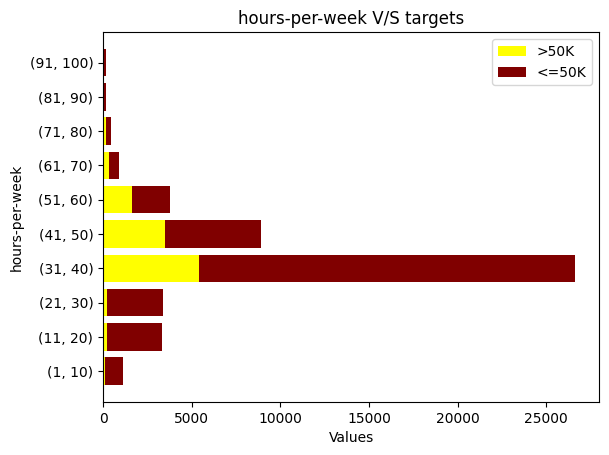

,hours-per-week,>50K,<=50K
0,"(1, 10)",105,1020
1,"(11, 20)",196,3132
2,"(21, 30)",225,3173
3,"(31, 40)",5419,21220
4,"(41, 50)",3519,5398
5,"(51, 60)",1624,2135
6,"(61, 70)",332,570
7,"(71, 80)",167,289
8,"(81, 90)",52,95
9,"(91, 100)",48,123


In [ ]:
dict = {(i+1, i+10):[] for i in range(0, data['hours-per-week'].max(), 10)}
add = 0

for (key, val) in dict.items():
  x, y = key[0], key[1]
  gp = data[(data['hours-per-week'] >= x) & (data['hours-per-week'] <= y)].groupby('targets').agg({'hours-per-week':'count'})

  dict[key].append(gp['hours-per-week'][1] if not gp.empty else 0)
  dict[key].append(gp['hours-per-week'][0] if not gp.empty else 0)

  add += gp['hours-per-week'][1] if not gp.empty else 0
  add += gp['hours-per-week'][0] if not gp.empty else 0

print(add)
myPrintAndPlotFunction(dict, 'hours-per-week')

#**Determining 'targets' based on 'native-country' parameter**

48842


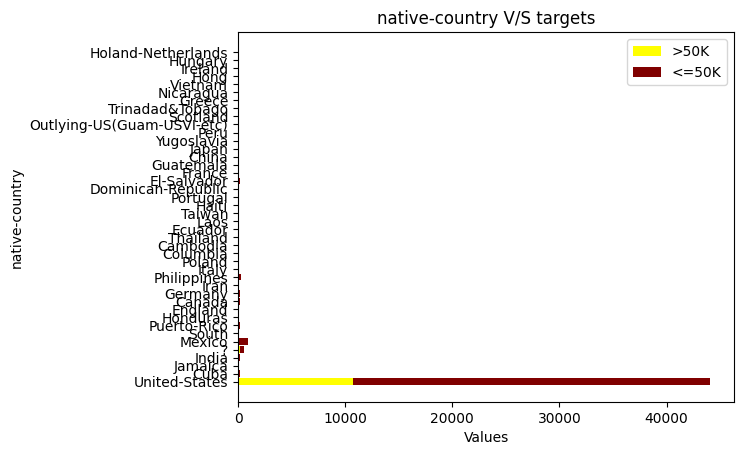

,native-country,>50K,<=50K
0,United-States,10763,33324
1,Cuba,34,104
2,Jamaica,15,91
3,India,62,93
4,?,146,437
5,Mexico,48,907
6,South,20,95
7,Puerto-Rico,20,164
8,Honduras,2,18
9,England,47,80


In [ ]:
dict = {string:[] for string in (data['native-country'])}
add = 0

for (key, val) in dict.items():
  gp = data[(data['native-country'] == key) & (data['targets'] == '>50K')].value_counts().sum()
  dict[key].append(gp)
  add += gp

  gp = data[(data['native-country'] == key) & (data['targets'] == '<=50K')].value_counts().sum()
  dict[key].append(gp)

  add += gp

print(add)
myPrintAndPlotFunction(dict, 'native-country')

#**Adding new parameters**

In [ ]:
data.loc[((data['hours-per-week'] > 30) & (data['hours-per-week'] <= 50)), 'work-hour-metric'] = 'Nominal'
data.loc[((data['hours-per-week'] <= 30)), 'work-hour-metric'] = 'Under-worked'
data.loc[((data['hours-per-week'] > 50)), 'work-hour-metric'] = 'Over-worked'
data.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,targets,work-hour-metric
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Nominal
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Under-worked
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Nominal
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Nominal
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Nominal
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Nominal
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,Under-worked
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,Nominal
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,Nominal
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,Nominal


48842


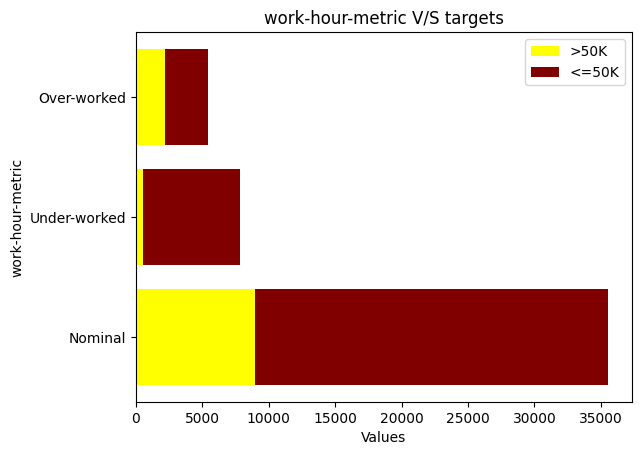

,work-hour-metric,>50K,<=50K
0,Nominal,8938,26618
1,Under-worked,526,7325
2,Over-worked,2223,3212


In [ ]:
dict = {string:[] for string in (data['work-hour-metric'])}
add = 0

for (key, val) in dict.items():
  gp = data[(data['work-hour-metric'] == key) & (data['targets'] == '>50K')].value_counts().sum()
  dict[key].append(gp)
  add += gp

  gp = data[(data['work-hour-metric'] == key) & (data['targets'] == '<=50K')].value_counts().sum()
  dict[key].append(gp)

  add += gp

print(add)
myPrintAndPlotFunction(dict, 'work-hour-metric')

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'targets', 'work-hour-metric'],
      dtype='object')